In [1]:
using Pkg
Pkg.activate("../EEG_plots/env")

  Activating project at `~/Desktop/EEG_plots/env`


In [3]:
using GLMakie
using StatsBase # mean/std
using Pipe
using ColorSchemes
using Colors
using LinearAlgebra

In [5]:
Makie.inline!(true)

true

# 2D Colorbar

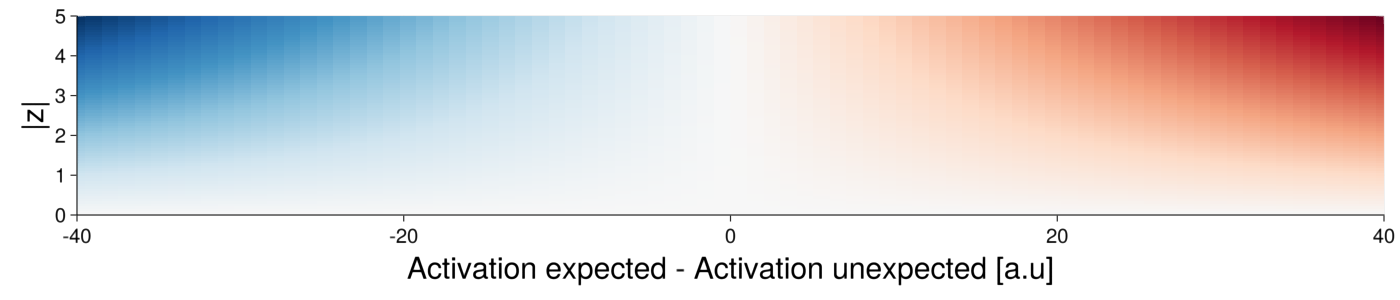

In [61]:
let
    f = Figure(resolution = (1400, 300))
    ax = Axis(f[1, 1], xlabel = "Activation expected - Activation unexpected [a.u]", ylabel = "|z|",
    xlabelsize=30, ylabelsize=30,  yticklabelsize=20,  xticklabelsize=20)
    xs = range(-40, 40, length = 80)
    ys = range(0, 5, length = 80)
    zs = [x * y  for x in xs, y in ys]

    heatmap!(xs, ys, zs,  colormap=Reverse("RdBu"))
    xlims!(-40, 40)
    ylims!(0, 5)
    hidespines!(ax, :t, :r)  
    f
    #save("plots/2d_colorbar.jpg", f)
end

# Circular color gradient plot

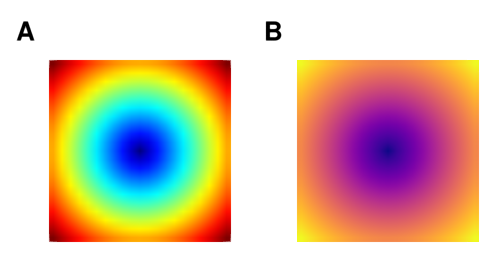

In [60]:
begin

    cmap1 = to_colormap(:jet)
    cmap2 = to_colormap(:plasma)
    function color(i, j, cmap)
        distance_01 = norm(Point2f(i, j)) / sqrt(2)
        return Makie.interpolated_getindex(cmap, distance_01, (0, 1))
    end

    colors1 = [color(i, j, cmap1) for i in -1:0.1:1, j in -1:0.1:1]
    colors2 = [color(i, j, cmap2) for i in -1:0.1:1, j in -1:0.1:1]
    f = Figure()
    ga = f[1, 1] = GridLayout()
    gb = f[1, 2] = GridLayout()
    ax1 = Axis(ga[1, 1], height = 200, width = 200)# aspect = 1)
    
    mesh!(Rect2f(0, 0, 0.5, 0.5); color=colors1, shading=false)
    hidespines!(ax1) # delete unnecessary spines (lines)
    hidedecorations!(ax1) 

    colgap!(ga, 10)
   ax2 = Axis(gb[1, 1], height = 200, width = 200)#, aspect = 1)
   mesh!(Rect2f(0, 0, 0.5, 0.5); color=colors2, shading=false)
   for (label, layout) in zip(["A", "B"], [ga, gb])
    Label(layout[1, 1, TopLeft()], label,
        fontsize = 26,
        font = :bold,
        padding = (0, 5, 5, 0),
        halign = :right)
    end
    hidespines!(ax2) # delete unnecessary spines (lines)
    hidedecorations!(ax2) 
resize_to_layout!(f)
f
end

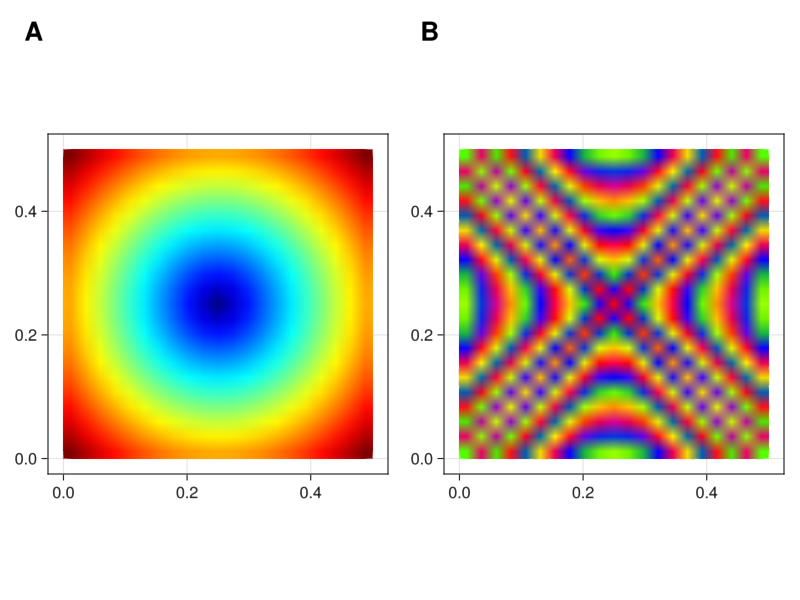

In [47]:
begin

    cmap1 = to_colormap(:jet)
    cmap2 = to_colormap(:prism)
    function color(i, j, cmap)
        distance_01 = norm(Point2f(i, j)) / sqrt(2)
        return Makie.interpolated_getindex(cmap, distance_01, (0, 1))
    end

    colors1 = [color(i, j, cmap1) for i in -1:0.1:1, j in -1:0.1:1]
    colors2 = [color(i, j, cmap2) for i in -1:0.1:1, j in -1:0.1:1]
    f = Figure()
    ga = f[1, 1] 
    gb = f[1, 2]
    ax1 = Axis(ga[1, 1], aspect = 1)
    
    mesh!(Rect2f(0, 0, 0.5, 0.5); color=colors1, shading=false)
    #hidespines!(ax1) # delete unnecessary spines (lines)
    #hidedecorations!(ax1) 
    #xlims!(0, 0.6)
    #ylims!(0, 0.6)

   ax2 = Axis(gb[1, 1], aspect = 1)
   mesh!(Rect2f(0, 0, 0.5, 0.5); color=colors2, shading=false)
   for (label, layout) in zip(["A", "B"], [ga, gb])
    Label(layout[1, 1, TopLeft()], label,
        fontsize = 26,
        font = :bold,
        padding = (0, 5, 5, 0),
        halign = :right)
    end

f
end

ErrorException: `Makie.convert_arguments` for the plot type Heatmap{Tuple{Vector{Float64}}} and its conversion trait DiscreteSurface() was unsuccessful.

The signature that could not be converted was:
::Vector{Float32}

Makie needs to convert all plot input arguments to types that can be consumed by the backends (typically Arrays with Float32 elements).
You can define a method for `Makie.convert_arguments` (a type recipe) for these types or their supertypes to make this set of arguments convertible (See http://docs.makie.org/stable/documentation/recipes/index.html).

Alternatively, you can define `Makie.convert_single_argument` for single arguments which have types that are unknown to Makie but which can be converted to known types and fed back to the conversion pipeline.
